In [2]:
from pathlib import Path
import motmetrics as mm
import json
from utils import mean_frame_iou, recall, precision
from utils.single_shot_pipeline import InjuryEvaluator, ExperimentPipeline
from utils.multirun_manager import MultirunManager
import numpy as np
import pythonTexTools as pytex

%load_ext autoreload
%autoreload 2

PythonTexTools: tikzplotlib not working. You cannot export figures to tikz.


## Evaluation of single shot frameworks

In [3]:
# first run with chat gpt. Prompt was wrong. It only searches for people with a gray shirt.
run_2024_07_29_13_17_24 = Path("/home/blei/cloud_track/evaluation/archive/outputs/2024-07-29/16-25-34/") 

# run with chat gpt. Prompt corrected. It now searches for all injured people.
run_2024_07_30_15_46_57 = Path("/home/blei/cloud_track/evaluation/archive/outputs/2024-07-30/15-46-57/")

# run with paligemma (cpu only). Model name in json is wrong (it is the same as the chat gpt model).
run_2024_07_31_12_01_21 = Path("/home/blei/cloud_track/evaluation/archive/outputs/2024-07-31/12-01-21")

# run with paligemma. Model name in json is correct. # confidence threshold 0.25
run_2024_07_31_15_14_19 = Path("/home/blei/cloud_track/evaluation/archive/outputs/2024-07-31/15-14-19")

# run with paligemma. Decreased box confidence threshold to 0.1
run_2024_08_01_12_38_58 = Path("/home/blei/cloud_track/outputs/2024-08-01/12-59-28")

# select run for cathegory
run_sard_singleshot_chatgpt = run_2024_07_30_15_46_57
run_sard_singleshot_paligemma = run_2024_07_31_15_14_19

# select cathegory to analyze
run_sard_singleshot = run_sard_singleshot_chatgpt

## Evaluate: sard single shot run

#### Define GT Mapping

In [4]:
injury_annotation_file = Path("/home/blei/referring_sard/assets/referring_SARD_labels.json")

#### Dataset Report

In [4]:
#pipeline = ExperimentPipeline(run_sard_singleshot, injury_annotation_file)
#pipeline.print_dataset_report()

#### Run paligemma analysis

In [5]:
#pipeline = ExperimentPipeline(run_sard_singleshot_paligemma, injury_annotation_file)
#pipeline.print_full_report(iou_threshold=0.5)


In [6]:
#fig = pipeline.make_precision_recall_plot()

#### Run ChatGPT Analysis

In [7]:
#pipeline = ExperimentPipeline(run_sard_singleshot_chatgpt, injury_annotation_file)
#pipeline.print_full_report(iou_threshold=0.5)


In [8]:
#fig = pipeline.make_precision_recall_plot()

#### Define Helper Functions:

In [9]:
# get the average time per frame
#frame_times = [abs(res[frame]["time_s"]) for frame in frames]

# print average time per frame
#print(f"Average time per frame: {np.mean(frame_times):.4f} seconds")

# number of detections per frame
#num_detections = [len(res[frame]["result"]) for frame in frames]

# plot time of frame vs number of detections
#plt.scatter(num_detections, frame_times)
#plt.ylabel("Time per frame (s)")
#plt.xlabel("Number of detections")
#plt.title("Time per frame vs number of detections")
#plt.show()




## Multirun Analysis

In [5]:
# runs with tasks shirt, injury, person
# frame limit 200 multirun
run_2024_08_08 = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-07/16-10-22")

# full analysis
run_2024_08_09 = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-09/11-26-53")

# baseline analysis: detector only: sam, glee lite, plus, pro
run_2024_08_15_17_13_07 = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-15/17-13-07")

# runs with tasks: person, shirt_gray, shirt_green, shirt_blue, pose_laying, pose_standing, pose_sitting, injury
# full analysis
run_2024_08_16 = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-16/19-07-32")

# baseline analysis
run_2024_08_18 = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-18/15-38-33")

injury_annotation_file = Path("/home/blei/referring_sard/assets/referring_SARD_labels.json")
selected_run_ours = run_2024_08_16
selected_run_baseline = run_2024_08_18

In [6]:
mode = "ours" # SELECT MODE: "baseline" or "ours"!!!!!
mm = MultirunManager(selected_run_ours, injury_annotation_file)

In [7]:

res_ours = mm.get_and_print_results(iou_threshold=0.5, mode=mode)

#----------------------------------------#
Pipeline:  gpt-4o-mini_sam/sar_person
Using cached version for gpt-4o-mini_sam/sar_person.
Precision: 0.8998611593196807, Recall: 0.7962223587223587, AP: 0.7522601755811302
#----------------------------------------#
Pipeline:  llava-hf/llava-1.5-13b-hf_sam/sar_person
Using cached version for llava-hf/llava-1.5-13b-hf_sam/sar_person.
Precision: 0.8752308984047019, Recall: 0.8003685503685504, AP: 0.8294660828753038
#----------------------------------------#
Pipeline:  llava-hf/llava-1.5-7b-hf_sam/sar_person
Using cached version for llava-hf/llava-1.5-7b-hf_sam/sar_person.
Precision: 0.8723831853960811, Recall: 0.7999078624078624, AP: 0.7495926962466558
#----------------------------------------#
Pipeline:  paligemma_sam/sar_person
Using cached version for paligemma_sam/sar_person.
Precision: 0.8696517412935323, Recall: 0.8052825552825553, AP: 0.828800515502325
#----------------------------------------#
Pipeline:  gpt-4o-mini_sam/sar_shirt_gray
Us

In [8]:
mode = "baseline" # SELECT MODE: "baseline" or "ours"!!!!!
mm = MultirunManager(selected_run_baseline, injury_annotation_file)
res_baseline = mm.get_and_print_results(iou_threshold=0.5, mode=mode)

#----------------------------------------#
Pipeline:  None_sam_hq/sar_person
Using cached version for None_sam_hq/sar_person.
Precision: 0.8798252002913328, Recall: 0.742014742014742, AP: 0.7260117463957936
#----------------------------------------#
Pipeline:  None_glee_lite/sar_person
Using cached version for None_glee_lite/sar_person.
Precision: 0.6488015082143819, Recall: 0.36993243243243246, AP: 0.31665972315260016
#----------------------------------------#
Pipeline:  None_glee_plus/sar_person
Using cached version for None_glee_plus/sar_person.
Precision: 0.8579943899018233, Recall: 0.3757678132678133, AP: 0.34455170523149065
#----------------------------------------#
Pipeline:  None_glee_pro/sar_person
Using cached version for None_glee_pro/sar_person.
Precision: 0.6271046094396908, Recall: 0.3488943488943489, AP: 0.30987376388031734
#----------------------------------------#
Pipeline:  None_sam_hq/sar_shirt_gray
Using cached version for None_sam_hq/sar_shirt_gray.
Precision: 0.30

In [12]:
print("Baselines:")
tab_baseline, headers_baseline = mm.print_result_table(res_baseline, mode="baseline")
print("Ours:")
tab_ours, headers_ours = mm.print_result_table(res_ours, mode="ours")

Baselines:
#----------------------------------------#
+---------------------+---------+---------+------------+---------------+---------------+------------------+---------------+---------------+------------------+--------------+--------------+-----------------+
| Exp                 | SAM P   | SAM R   | SAM [AP]   | glee lite P   | glee lite R   | glee lite [AP]   | glee plus P   | glee plus R   | glee plus [AP]   | glee pro P   | glee pro R   | glee pro [AP]   |
+=====================+=========+=========+============+===============+===============+==================+===============+===============+==================+==============+==============+=================+
| person              | 87.98%  | 74.2%   | 72.6%      | 64.88%        | 36.99%        | 31.67%           | 85.8%         | 37.58%        | 34.46%           | 62.71%       | 34.89%       | 30.99%          |
+---------------------+---------+---------+------------+---------------+---------------+------------------+-----------

- Anhand von ein paar Videos mit noch komplexeren Beispielen zeigen, dass systeme an ihre Grenzen kommen. 
    - Zeigen, dass die großen modelle ein besseres semantisches Verständnis hat.

Weiterhin: Erklären, warum mAP bei ChatGPT höher ist. Ergumentieren mit Recall und: ChatGPT ist darauf trainiert, vorsichtíg zu sein.
Processing time per frame ist ok.

In [13]:
def keep_only_x(tab, header, x):
    
    tab_out = []    
    for row in tab:
        row_out = []
        row_out.append(row[0]) # add the col header
        
        for i, cell in enumerate(row):
            if i == 0:
                continue
            if x in header[i]:
                row_out.append(cell)
        tab_out.append(row_out)
        
                
    # filter header as well
    header_out = []
    header_out.append(header[0])
    for i, cell in enumerate(header):
        if i == 0:
            continue
        if "AP" in header[i]:
            header_out.append(cell)
    return tab_out, header_out
        

In [15]:
output_dir = Path.cwd()
exporter = pytex.tex_exporter(output_dir)

tex_tab, header = keep_only_x(tab_ours, headers_ours, x="AP")

exporter.add_table("OursAP", *keep_only_x(tab_ours, headers_ours, x="AP"))
exporter.add_table("BaselineAP", *keep_only_x(tab_baseline, headers_baseline,x="AP"))

In [16]:
exporter.export()

Writing output to /home/blei/cloud_track/evaluation/python_results.tex.
Exporting elements as LaTex functions
Variables:
Figures:
Tables:
\tabOursAP
\tabBaselineAP


### debugging workbench

Experiment: llava-hf/llava-1.5-7b-hf_sam/sar_person

Detector Performance in terms of class (i.e. in terms of 'person'):


100%|██████████| 100/100 [01:05<00:00,  1.53it/s]


Writing cache to disk.
Precision: 86.84%
Recall: 80.57%
Average Precision: 82.86%

Performance after semantic classification (i.e. in terms of 'person' & 'is injured'):
Using cached version for llava-hf/llava-1.5-7b-hf_sam/sar_person.
Precision: 87.24%
Recall: 79.99%
Average Precision: 74.96%

Confusion Matrix:
-------  ------
TP 5209  FP 762
FN 1303  TN N/A
-------  ------
--------------------
Size dependent performance:

Recall for size small: 79.48%
Recall for size medium: 80.40%
Recall for size large: 81.92%
--------------------
Time Information:

Average time per frame: 3.87s
Average time per object: 1.16s
################
Using cached version for llava-hf/llava-1.5-7b-hf_sam/sar_person.
Precision: 93.76%
Recall: 76.58%
Average Precision: 74.96%
Using cached version for llava-hf/llava-1.5-7b-hf_sam/sar_person.

Max precision: 1.0364768683274022
Max recall: 0.7999078624078624
Average precision:  0.8972001959588263


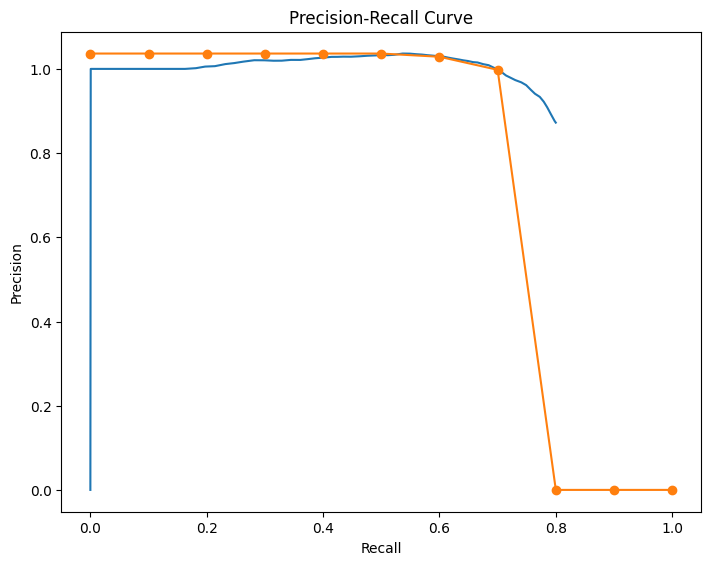

In [20]:
#run = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-07/16-10-22/11")
run = Path("/home/blei/cloud_track/evaluation/archive/multirun/2024-08-16/19-07-32/0")

pipeline = ExperimentPipeline(run, injury_annotation_file)
pipeline.print_full_report(iou_threshold=0.5)
print("################")
pipeline.print_precision_recall(iou_threshold=0.5, conf_threshold=0.25)
fig = pipeline.make_precision_recall_plot()